<a href="https://colab.research.google.com/github/Henvitha26/G9_DS/blob/main/Assignments/Harshitha/Outliers_dectection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#outliers detection and removal type zscore and standard deviation
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)


In [ ]:
df=pd.read_csv("SOCR-HeightWeight.csv")

In [ ]:
df.sample(5)

,Index,Height(Inches),Weight(Pounds)
12132,12133,66.00974,106.45860
14014,14015,68.07784,112.95450
5989,5990,66.21908,99.78213
1847,1848,69.82790,137.24350
16233,16234,70.36077,142.23210


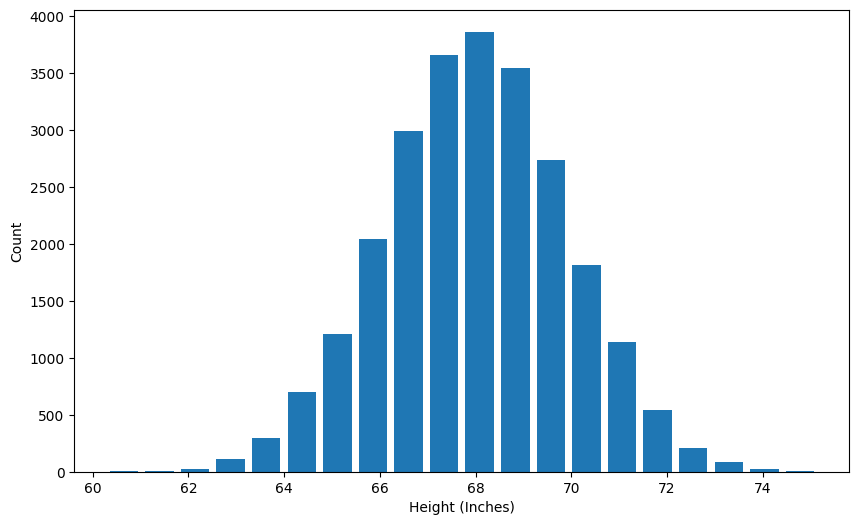

In [ ]:
plt.hist(df['Height(Inches)'], bins=20, rwidth=0.8)
plt.xlabel("Height (Inches)")
plt.ylabel("Count")
plt.show()


In [ ]:
min_height = df['Height(Inches)'].min()
print("Minimum Height (Inches):", min_height)


Minimum Height (Inches): 60.27836


In [ ]:
max_height = df['Height(Inches)'].max()
print("Maximum Height (Inches):", max_height)

Maximum Height (Inches): 75.1528


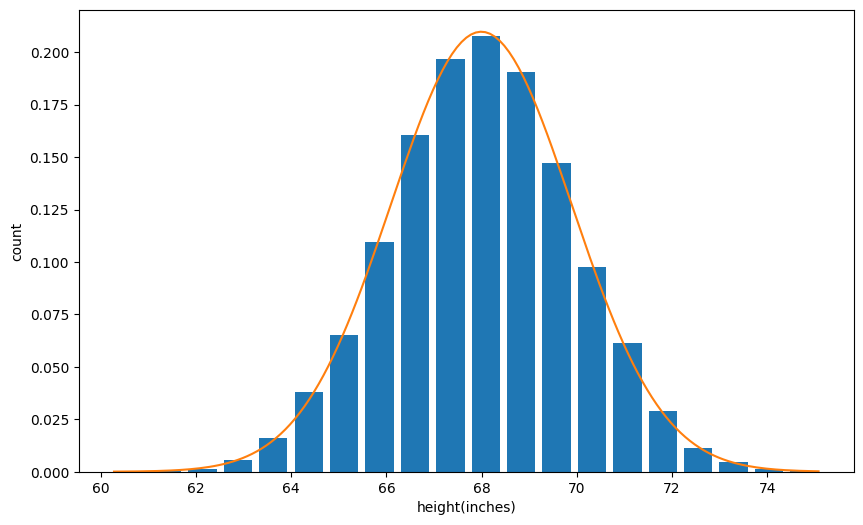

In [ ]:
import numpy as np
from scipy.stats import norm
plt.hist(df['Height(Inches)'],bins=20,rwidth=0.8,density=True)
plt.xlabel("height(inches)")
plt.ylabel("count")
rng=np.arange(min_height,max_height,0.1)
plt.plot(rng,norm.pdf(rng,df['Height(Inches)'].mean(),df['Height(Inches)'].std()))

In [ ]:
df['Height(Inches)'].mean()

67.99311359679999

In [ ]:
df['Height(Inches)'].std()

1.9016787712056105

In [ ]:
 upper_limit=df['Height(Inches)'].mean() + 3*df['Height(Inches)'].std()
 upper_limit

73.69814991041682

In [ ]:
 lower_limit=df['Height(Inches)'].mean() - 3*df['Height(Inches)'].std()
 lower_limit

62.288077283183156

In [ ]:
df[(df['Height(Inches)'] > upper_limit) | (df['Height(Inches)'] < lower_limit)]


,Index,Height(Inches),Weight(Pounds)
138,139,73.90107,151.39130
174,175,73.83364,139.29830
412,413,62.01666,109.08480
1162,1163,74.24899,150.21670
1383,1384,74.19488,129.05970
1893,1894,75.15280,146.97010
2395,2396,73.99549,142.90160
2481,2482,75.11519,153.95620
2651,2652,60.61265,88.04646
3696,3697,61.89340,95.74545


In [ ]:
df_no_outlier_std_dev= df[(df['Height(Inches)'] < upper_limit) & (df['Height(Inches)'] > lower_limit)]
df_no_outlier_std_dev.shape


(24949, 3)

In [ ]:
df = df_no_outlier_std_dev.copy()
desired_rows = df.shape[0]
df = df.iloc[:desired_rows]


In [ ]:
df['zscore']=(df['Height(Inches)']-df['Height(Inches)'].mean())/df['Height(Inches)'].std()

In [ ]:
df.head(5)

,Index,Height(Inches),Weight(Pounds),zscore
0,1,65.78331,112.9925,-1.172310
1,2,71.51521,136.4873,1.873410
2,3,69.39874,153.0269,0.748796
3,4,68.21660,142.3354,0.120650
4,5,67.78781,144.2971,-0.107193


In [ ]:
df[df['zscore']>3]

,Index,Height(Inches),Weight(Pounds),zscore
3680,3681,73.6704,147.9165,3.018598
16852,16853,73.6454,131.3343,3.005314


In [ ]:
df[df['zscore']<3]

,Index,Height(Inches),Weight(Pounds),zscore
0,1,65.78331,112.9925,-1.172310
1,2,71.51521,136.4873,1.873410
2,3,69.39874,153.0269,0.748796
3,4,68.21660,142.3354,0.120650
4,5,67.78781,144.2971,-0.107193
...,...,...,...,...
24995,24996,69.50215,118.0312,0.803744
24996,24997,64.54826,120.1932,-1.828570
24997,24998,64.69855,118.2655,-1.748711
24998,24999,67.52918,132.2682,-0.244619


In [ ]:
df[(df['zscore'] > 3) | (df['zscore'] < -3)]


,Index,Height(Inches),Weight(Pounds),zscore
3680,3681,73.67040,147.9165,3.018598
6917,6918,62.29058,100.3800,-3.028217
16852,16853,73.64540,131.3343,3.005314


In [ ]:
df_no_outliers=df[(df['zscore'] > 3) & (df['zscore'] < -3)]
df_no_outliers.head()

,Index,Height(Inches),Weight(Pounds),zscore


In [ ]:
df.shape[0]-df_no_outliers.shape[0]

24949

In [ ]:
 #usung IQR (Interquartile Range) Method
 # Calculate quartiles
Q1 = df['Height(Inches)'].quantile(0.25)
Q3 = df['Height(Inches)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Height(Inches)'] < lower_bound) | (df['Height(Inches)'] > upper_bound)]


In [ ]:
outliers

,Index,Height(Inches),Weight(Pounds),zscore
269,270,73.26872,130.2636,2.805160
1133,1134,62.75039,114.4900,-2.783891
1244,1245,62.64242,100.1982,-2.841262
1448,1449,73.38109,154.8178,2.864869
2186,2187,62.60611,129.7600,-2.860556
...,...,...,...,...
23635,23636,73.46216,140.9680,2.907947
23674,23675,73.55566,149.8402,2.957629
23896,23897,73.38057,154.3189,2.864593
24078,24079,73.22107,136.7360,2.779841


In [ ]:
#Isolation Forest
#Isolation Forest is an algorithm that identifies outliers by isolating observations in random subspaces. It's effective for high-dimensional data.
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1)  # Adjust contamination based on expected outlier proportion
model.fit(df[['Height(Inches)']])

# Predict outliers
outliers = df[model.predict(df[['Height(Inches)']]) == -1]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
outliers

,Index,Height(Inches),Weight(Pounds),zscore
1,2,71.51521,136.48730,1.873410
15,16,71.09160,139.99750,1.648319
18,19,71.23033,137.90250,1.722035
22,23,63.48115,97.90191,-2.395592
34,35,71.80484,140.10150,2.027308
...,...,...,...,...
24973,24974,71.32072,125.59280,1.770065
24983,24984,63.77967,111.49110,-2.236970
24991,24992,71.91656,128.28400,2.086672
24996,24997,64.54826,120.19320,-1.828570


In [ ]:
#using Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

# Fit LOF model
model = LocalOutlierFactor(n_neighbors=20)
outliers = df[model.fit_predict(df[['Height(Inches)']]) == -1]


In [ ]:
outliers

,Index,Height(Inches),Weight(Pounds),zscore
3275,3276,67.96518,129.2041,-0.012945
6917,6918,62.29058,100.3800,-3.028217
